In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.utils import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
import pandas as pd
from sklearn.model_selection import train_test_split
import pickle
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import re
from matplotlib import pyplot as plt 

In [2]:
## loading the imdb dataset
data = pd.read_csv('movie.csv')
data.head()

text  label
0  I grew up (b. 1965) watching and loving the Th...      0
1  When I put this movie in my DVD player, and sa...      0
2  Why do people who do not know what a particula...      0
3  Even though I have great interest in Biblical ...      0
4  Im a die hard Dads Army fan and nothing will e...      1

In [3]:
data.shape

(40000, 2)

In [4]:
data.isnull().sum()

text     0
label    0
dtype: int64

In [5]:
data['label'].value_counts()

label
0    20019
1    19981
Name: count, dtype: int64

- Classes are not heavily imbalanced

In [6]:
data['clean_review'] = data['text'].apply(lambda x: re.sub(r"[^a-zA-Z\s]", " ", x))
data['clean_review']

0        I grew up  b        watching and loving the Th...
1        When I put this movie in my DVD player  and sa...
2        Why do people who do not know what a particula...
3        Even though I have great interest in Biblical ...
4        Im a die hard Dads Army fan and nothing will e...
                               ...                        
39995     Western Union  is something of a forgotten cl...
39996    This movie is an incredible piece of work  It ...
39997    My wife and I watched this movie because we pl...
39998    When I first watched Flatliners  I was amazed ...
39999    Why would this film be so good  but only gross...
Name: clean_review, Length: 40000, dtype: object

In [7]:
data.head()

text  label  \
0  I grew up (b. 1965) watching and loving the Th...      0   
1  When I put this movie in my DVD player, and sa...      0   
2  Why do people who do not know what a particula...      0   
3  Even though I have great interest in Biblical ...      0   
4  Im a die hard Dads Army fan and nothing will e...      1   

                                        clean_review  
0  I grew up  b        watching and loving the Th...  
1  When I put this movie in my DVD player  and sa...  
2  Why do people who do not know what a particula...  
3  Even though I have great interest in Biblical ...  
4  Im a die hard Dads Army fan and nothing will e...

In [8]:
data['clean_review'] = data['clean_review'].apply(lambda x: x.lower())
data['clean_review']

0        i grew up  b        watching and loving the th...
1        when i put this movie in my dvd player  and sa...
2        why do people who do not know what a particula...
3        even though i have great interest in biblical ...
4        im a die hard dads army fan and nothing will e...
                               ...                        
39995     western union  is something of a forgotten cl...
39996    this movie is an incredible piece of work  it ...
39997    my wife and i watched this movie because we pl...
39998    when i first watched flatliners  i was amazed ...
39999    why would this film be so good  but only gross...
Name: clean_review, Length: 40000, dtype: object

In [9]:
data.head()

text  label  \
0  I grew up (b. 1965) watching and loving the Th...      0   
1  When I put this movie in my DVD player, and sa...      0   
2  Why do people who do not know what a particula...      0   
3  Even though I have great interest in Biblical ...      0   
4  Im a die hard Dads Army fan and nothing will e...      1   

                                        clean_review  
0  i grew up  b        watching and loving the th...  
1  when i put this movie in my dvd player  and sa...  
2  why do people who do not know what a particula...  
3  even though i have great interest in biblical ...  
4  im a die hard dads army fan and nothing will e...

In [10]:
X = data['clean_review']
y = data['label']

In [11]:
X.head()

0    i grew up  b        watching and loving the th...
1    when i put this movie in my dvd player  and sa...
2    why do people who do not know what a particula...
3    even though i have great interest in biblical ...
4    im a die hard dads army fan and nothing will e...
Name: clean_review, dtype: object

In [12]:
y.head()

0    0
1    0
2    0
3    0
4    1
Name: label, dtype: int64

In [13]:
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=3)

In [14]:
xtrain.head()

11900    while it s one of two movies on tales of voodo...
25851    if you are among the imdb audience that put hi...
3816     not a terrible film    my    year old boy love...
4503     movies are something you see on saturday night...
33987    i admire  kissing on the mouth  for its frankn...
Name: clean_review, dtype: object

In [15]:
xtrain.shape

(32000,)

In [16]:
ytrain.shape

(32000,)

In [17]:
xtest.head()

30549    i rented this tape a couple of years ago  and ...
28871    someone mentioned editing  this is edited badl...
9826     hellraiser  bloodline is only a so so film  i ...
35726    i bought a set of   dvds for    bucks at my lo...
7841     for a movie with a plot like this i would norm...
Name: clean_review, dtype: object

In [18]:
xtest.shape

(8000,)

In [19]:
ytest.shape

(8000,)

In [20]:
ytrain.head()

11900    0
25851    1
3816     0
4503     1
33987    0
Name: label, dtype: int64

In [21]:
ytest.head()

30549    0
28871    0
9826     0
35726    0
7841     1
Name: label, dtype: int64

In [22]:
# Tokenizing the reviews
num_of_words = 20000 # max number of unique words to keep
oov_token = "<OOV>" # out of vocabulary token for unseen words

tokenizer = Tokenizer(num_words=num_of_words, oov_token=oov_token)
tokenizer.fit_on_texts(xtrain) # learn word to index mapping
word_index = tokenizer.word_index # dictionary of words and their integer mappings

In [23]:
word_index

{'<OOV>': 1,
 'the': 2,
 'and': 3,
 'a': 4,
 'of': 5,
 'to': 6,
 'is': 7,
 'br': 8,
 'it': 9,
 'in': 10,
 'i': 11,
 'this': 12,
 'that': 13,
 's': 14,
 'was': 15,
 'as': 16,
 'movie': 17,
 'with': 18,
 'for': 19,
 'but': 20,
 'film': 21,
 'you': 22,
 't': 23,
 'on': 24,
 'not': 25,
 'he': 26,
 'are': 27,
 'his': 28,
 'have': 29,
 'one': 30,
 'be': 31,
 'at': 32,
 'all': 33,
 'they': 34,
 'by': 35,
 'an': 36,
 'who': 37,
 'so': 38,
 'from': 39,
 'like': 40,
 'there': 41,
 'or': 42,
 'just': 43,
 'her': 44,
 'about': 45,
 'out': 46,
 'if': 47,
 'has': 48,
 'what': 49,
 'some': 50,
 'good': 51,
 'can': 52,
 'more': 53,
 'very': 54,
 'when': 55,
 'she': 56,
 'up': 57,
 'no': 58,
 'time': 59,
 'even': 60,
 'my': 61,
 'would': 62,
 'story': 63,
 'only': 64,
 'which': 65,
 'really': 66,
 'see': 67,
 'their': 68,
 'had': 69,
 'me': 70,
 'well': 71,
 'we': 72,
 'were': 73,
 'much': 74,
 'than': 75,
 'get': 76,
 'other': 77,
 'bad': 78,
 'people': 79,
 'been': 80,
 'also': 81,
 'do': 82,
 'will'

In [24]:
# convert reviews into sequences (integer encoded form)
xtrain_sequences = tokenizer.texts_to_sequences(xtrain)
xtrain_sequences

[[137,
  9,
  14,
  30,
  5,
  108,
  100,
  24,
  2620,
  5,
  5503,
  6905,
  41,
  14,
  58,
  5503,
  42,
  234,
  2356,
  10,
  9,
  2,
  849,
  14733,
  9,
  584,
  2469,
  20,
  2,
  258,
  417,
  7,
  1069,
  39,
  584,
  2469,
  2,
  417,
  7,
  1,
  716,
  6,
  584,
  2469,
  2707,
  1069,
  39,
  358,
  14,
  584,
  2469,
  4,
  552,
  5,
  358,
  19476,
  10,
  4,
  1769,
  3,
  1426,
  2,
  249,
  151,
  34,
  29,
  6,
  3215,
  45,
  7,
  4,
  13560,
  820,
  37,
  34,
  708,
  1,
  58,
  1016,
  10,
  12,
  42,
  101,
  77,
  132,
  191,
  8,
  8,
  4,
  244,
  758,
  1,
  2803,
  57,
  10,
  4,
  521,
  3,
  186,
  6,
  31,
  545,
  3,
  422,
  35,
  33,
  2,
  358,
  56,
  5332,
  1,
  6,
  220,
  3,
  410,
  10,
  2,
  525,
  18,
  44,
  3,
  44,
  1749,
  141,
  1167,
  283,
  34,
  76,
  41,
  9,
  475,
  762,
  13,
  141,
  1167,
  476,
  6,
  194,
  1,
  14,
  9042,
  141,
  1167,
  1190,
  50,
  420,
  5,
  320,
  5,
  7386,
  3,
  26,
  14,
  349,
  10,
  2602,


In [25]:
# saving the tokenizer object
with open('tokenizer.pkl', 'wb') as file:
    pickle.dump(tokenizer, file)

In [26]:
# # padding sequences to make them in uniform length
max_length = 250
xtrain_padded_sequences = pad_sequences(xtrain_sequences, maxlen=max_length, padding='post', truncating='post')
xtrain_padded_sequences

array([[  137,     9,    14, ...,  2388,  8302, 11495],
       [   47,    22,    27, ...,     0,     0,     0],
       [   25,     4,   381, ...,     0,     0,     0],
       ...,
       [   11,   237,  2233, ...,     0,     0,     0],
       [   11,   104,    13, ...,     0,     0,     0],
       [   11,   140,   109, ...,     0,     0,     0]], dtype=int32)

In [27]:
xtrain_padded_sequences[0]

array([  137,     9,    14,    30,     5,   108,   100,    24,  2620,
           5,  5503,  6905,    41,    14,    58,  5503,    42,   234,
        2356,    10,     9,     2,   849, 14733,     9,   584,  2469,
          20,     2,   258,   417,     7,  1069,    39,   584,  2469,
           2,   417,     7,     1,   716,     6,   584,  2469,  2707,
        1069,    39,   358,    14,   584,  2469,     4,   552,     5,
         358, 19476,    10,     4,  1769,     3,  1426,     2,   249,
         151,    34,    29,     6,  3215,    45,     7,     4, 13560,
         820,    37,    34,   708,     1,    58,  1016,    10,    12,
          42,   101,    77,   132,   191,     8,     8,     4,   244,
         758,     1,  2803,    57,    10,     4,   521,     3,   186,
           6,    31,   545,     3,   422,    35,    33,     2,   358,
          56,  5332,     1,     6,   220,     3,   410,    10,     2,
         525,    18,    44,     3,    44,  1749,   141,  1167,   283,
          34,    76,

In [28]:
# saving the maxlength object
with open('max_length.pkl', 'wb') as file:
    pickle.dump(max_length, file)

In [29]:
embedding_dimensions = 128

In [30]:
from tensorflow.keras.optimizers import Adam

In [31]:
from tensorflow.keras.layers import Embedding, LSTM, Bidirectional, SpatialDropout1D
from tensorflow.keras.regularizers import l2

In [32]:
model = Sequential()
model.add(Embedding(input_dim=num_of_words, output_dim=embedding_dimensions, input_length=max_length))

# Larger Bidirectional LSTM with more regularization
model.add(Bidirectional(LSTM(units=128, return_sequences=False, kernel_regularizer=l2(0.001))))  
model.add(Dropout(0.5))  # Slightly more dropout after LSTM
model.add(Dense(units=64, activation='relu', kernel_regularizer=l2(0.001)))  
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

# Compile
optimizer = Adam(learning_rate=0.0005)  # Slightly lower learning rate for stability
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

c:\Users\BW\anaconda3\envs\rnnproject\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [ ]:
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
checkpoint = ModelCheckpoint('best_model.keras', save_best_only=True, monitor='val_loss', mode='min')

In [34]:
history = model.fit(xtrain_padded_sequences, ytrain, epochs=15, batch_size=128, validation_split=0.2, callbacks=[early_stopping, checkpoint], verbose=1)

Epoch 1/15
200/200 ━━━━━━━━━━━━━━━━━━━━ 99s 480ms/step - accuracy: 0.5755 - loss: 0.9587 - val_accuracy: 0.8586 - val_loss: 0.4057
Epoch 2/15
200/200 ━━━━━━━━━━━━━━━━━━━━ 99s 494ms/step - accuracy: 0.8819 - loss: 0.3627 - val_accuracy: 0.8637 - val_loss: 0.3524
Epoch 3/15
200/200 ━━━━━━━━━━━━━━━━━━━━ 106s 529ms/step - accuracy: 0.9306 - loss: 0.2409 - val_accuracy: 0.8644 - val_loss: 0.3530
Epoch 4/15
200/200 ━━━━━━━━━━━━━━━━━━━━ 106s 528ms/step - accuracy: 0.9464 - loss: 0.1887 - val_accuracy: 0.8637 - val_loss: 0.3458
Epoch 5/15
200/200 ━━━━━━━━━━━━━━━━━━━━ 105s 526ms/step - accuracy: 0.9590 - loss: 0.1536 - val_accuracy: 0.8680 - val_loss: 0.3996
Epoch 6/15
200/200 ━━━━━━━━━━━━━━━━━━━━ 104s 518ms/step - accuracy: 0.9678 - loss: 0.1330 - val_accuracy: 0.8500 - val_loss: 0.3935
Epoch 7/15
200/200 ━━━━━━━━━━━━━━━━━━━━ 96s 478ms/step - accuracy: 0.9674 - loss: 0.1215 - val_accuracy: 0.8564 - val_loss: 0.4183


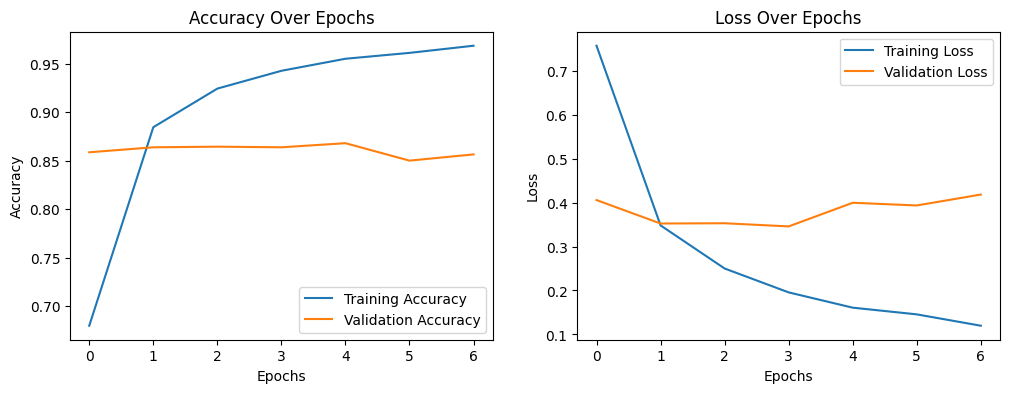

In [35]:
# Accuracy plot
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

### **Evaluating the model on the test set**

In [36]:
# loading the best model
from tensorflow.keras.models import load_model
best_model = load_model('best_model.keras')

In [37]:
# processing the test split
xtest_sequences = tokenizer.texts_to_sequences(xtest)
xtest_padded = pad_sequences(xtest_sequences, maxlen=max_length, padding='post', truncating='post')

In [38]:
test_loss, test_accuracy = best_model.evaluate(xtest_padded, ytest, batch_size=128)
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test Loss: {test_loss:.4f}")

63/63 ━━━━━━━━━━━━━━━━━━━━ 7s 110ms/step - accuracy: 0.8649 - loss: 0.3386
Test Accuracy: 0.8601
Test Loss: 0.3459


In [39]:
## Finding the optimal threshold
from sklearn.metrics import roc_curve, auc
y_pred_proba = best_model.predict(xtest_padded, batch_size=128)

63/63 ━━━━━━━━━━━━━━━━━━━━ 7s 113ms/step


In [40]:
y_pred_proba

array([[0.05666743],
       [0.01944691],
       [0.01911682],
       ...,
       [0.13748604],
       [0.00811727],
       [0.9870704 ]], dtype=float32)

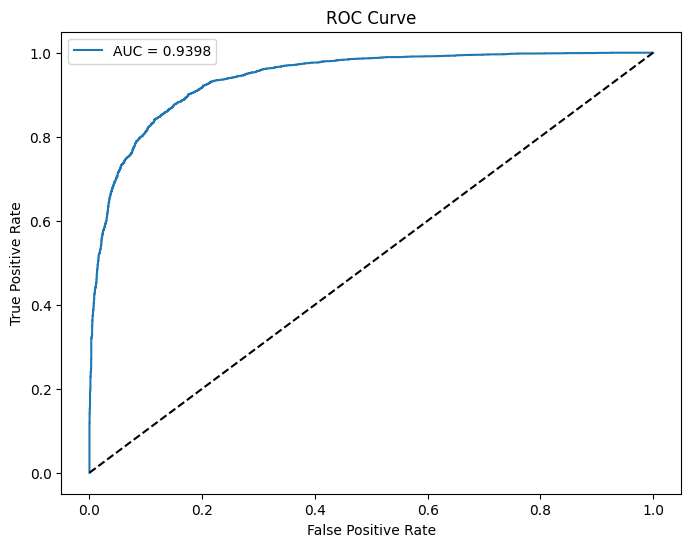

In [41]:
fpr, tpr, thresholds = roc_curve(ytest, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plotting ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.4f}')
plt.plot([0, 1], [0, 1], 'k--')  # Random guessing line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [42]:
# Calculate Youden's J statistic
# J-statistic helps to find the threshold where the model performs the best on the test set.

j_scores = tpr - fpr
best_threshold = thresholds[np.argmax(j_scores)]
print(f"Optimal Threshold: {best_threshold:.4f}")

Optimal Threshold: 0.5624


In [43]:
with open('best_threshold.pkl', 'wb') as file:
    pickle.dump(best_threshold, file)

In [45]:
# Classify test set using the optimal threshold
y_pred = (y_pred_proba >= best_threshold).astype(int)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(ytest, y_pred)
precision = precision_score(ytest, y_pred)
recall = recall_score(ytest, y_pred)
f1 = f1_score(ytest, y_pred)

print(f"Test Set Performance with Threshold {best_threshold:.4f}:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

Test Set Performance with Threshold 0.5624:
Accuracy: 0.8630
Precision: 0.8521
Recall: 0.8773
F1 Score: 0.8645
